<a href="https://colab.research.google.com/github/ftowards/TIL/blob/main/ML300/Part2_Ch5_%EB%AC%B8%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 주제 : 뉴스에서만 보던 코로나-19 데이터, 직접 분석하고 직접 판단해봅시다.
----------

## 실습 가이드
    1. 데이터를 다운로드하여 Colab에 불러옵니다.
    2. 필요한 라이브러리는 모두 코드로 작성되어 있습니다.
    3. 코드는 위에서부터 아래로 순서대로 실행합니다.
    
    
## 데이터 소개
    - 이번 주제는 John Hopkins 대학의 COVID-19 데이터셋을 사용합니다.
    
    - 총 10개의 파일 중 2개의 Raw 데이터를 사용합니다.
    RAW_global_confirmed_cases.csv
    RAW_global_global_deaths.csv

    - 각 파일의 컬럼은 아래와 같습니다.
    Country/Region: 국가
    Province/State: 지방/주
    Lat: 지역의 위도
    Long: 지역의 경도
    날짜: 각 날짜의 확진자/사망자 수
    
    
    
- 데이터 출처: https://www.kaggle.com/antgoldbloom/covid19-data-from-john-hopkins-university

## 최종 목표
    - 계속해서 업데이트되는 라이브 데이터 분석하기
    - Pandas를 이용해 원하는 표 형태로 변경
    - 데이터 시각화를 통한 인사이트 습득 방법의 이해
    - Plotly를 이용하여 Interactive plot하기
    - FBProphet을 이용해 시계열 데이터를 처리하는 방법 습득
    - 학습된 모델로 부터의 인사이트 획득 방법 습득

- 출제자 : 신제용 강사
---

## Step 0. 시계열 데이터에 관하여

### 코로나19 데이터셋에 관하여

### 시계열 데이터와 일반 테이블 데이터와 다른 점


### FBProphet 라이브러리 설명

## Step 1. 데이터셋 준비하기

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 문제 1. Colab Notebook에 Kaggle API 세팅하기


In [3]:
import os

In [4]:
# os.environ을 이용하여 Kaggle API Username, Key 세팅하기
os.environ['KAGGLE_USERNAME'] = ''
os.environ['KAGGLE_KEY'] = ''

### 문제 2. 데이터 다운로드 및 압축 해제하기


In [5]:
# Linux 명령어로 Kaggle API를 이용하여 데이터셋 다운로드하기 (!kaggle ~)
# Linux 명령어로 압축 해제하기

!rm *.*
!kaggle datasets download -d antgoldbloom/covid19-data-from-john-hopkins-university
!unzip '*.zip'

rm: cannot remove '*.*': No such file or directory
  0% 0.00/5.23M [00:00<?, ?B/s]
100% 5.23M/5.23M [00:00<00:00, 74.2MB/s]
Archive:  covid19-data-from-john-hopkins-university.zip
  inflating: CONVENIENT_global_confirmed_cases.csv  
  inflating: CONVENIENT_global_deaths.csv  
  inflating: CONVENIENT_global_metadata.csv  
  inflating: CONVENIENT_us_confirmed_cases.csv  
  inflating: CONVENIENT_us_deaths.csv  
  inflating: CONVENIENT_us_metadata.csv  
  inflating: RAW_global_confirmed_cases.csv  
  inflating: RAW_global_deaths.csv   
  inflating: RAW_us_confirmed_cases.csv  
  inflating: RAW_us_deaths.csv       


### 문제 3. Pandas 라이브러리로 csv파일 읽어들이기


In [24]:
df_case = pd.read_csv('RAW_global_confirmed_cases.csv')
df_death = pd.read_csv('RAW_global_deaths.csv')

In [8]:
df_case.head()

,Country/Region,Province/State,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,6/2/21,6/3/21,6/4/21,6/5/21,6/6/21,6/7/21,6/8/21,6/9/21,6/10/21,6/11/21,6/12/21,6/13/21,6/14/21,6/15/21,6/16/21,6/17/21,6/18/21,6/19/21,6/20/21,6/21/21,6/22/21,6/23/21,6/24/21,6/25/21,6/26/21,6/27/21,6/28/21,6/29/21,6/30/21,7/1/21,7/2/21,7/3/21,7/4/21,7/5/21,7/6/21,7/7/21,7/8/21,7/9/21,7/10/21,7/11/21
0,Afghanistan,NaN,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,74026,75119,76628,77963,79224,80841,82326,84050,85892,87716,88740,89861,91458,93272,93288,96531,98734,98734,98734,103902,105749,107957,109532,111592,111592,111592,115751,117158,118659,120216,120216,120216,120216,125937,127464,129021,130113,131586,131586,131586
1,Albania,NaN,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,132351,132360,132372,132374,132379,132384,132397,132415,132426,132437,132449,132459,132461,132469,132476,132481,132484,132488,132490,132490,132496,132497,132499,132506,132509,132512,132513,132514,132521,132523,132526,132534,132535,132537,132544,132557,132565,132580,132587,132592
2,Algeria,NaN,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,129640,129976,130361,130681,130958,131283,131647,132034,132355,132727,133070,133388,133742,134115,134458,134840,135219,135586,135821,136294,136679,137049,137403,137772,138113,138465,138840,139229,139626,140075,140550,141007,141471,141966,142447,143032,143652,144483,145296,146064
3,Andorra,NaN,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,13744,13752,13758,13758,13758,13777,13781,13791,13805,13813,13813,13813,13826,13828,13836,13839,13842,13842,13842,13864,13864,13873,13877,13882,13882,13882,13882,13900,13911,13918,13918,13918,13918,13918,13991,14021,14050,14075,14075,14075
4,Angola,NaN,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,34960,35140,35307,35594,35772,35854,36004,36115,36325,36455,36600,36705,36790,36921,37094,37289,37467,37604,37678,37748,37874,38002,38091,38371,38528,38556,38613,38682,38849,38965,39089,39172,39230,39300,39375,39491,39593,39791,39881,39958


## Step 2. 데이터 구조 변경 및 시각화하기


### 문제 4. 데이터프레임 구조를 Date를 Index로, 지역을 Column으로 변경


In [10]:
df_case.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278
Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Australia,Australia,Australia,Australia,Australia,Australia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burma,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,...,Sudan,Summer Olympics 2020,Suriname,Sweden,Switzerland,Syria,Taiwan*,Tajikistan,Tanzania,Thailand,Timor-Leste,Togo,Trinidad and Tobago,Tunisia,Turkey,US,Uganda,Ukraine,United Arab Emirates,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
Province/State,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Australian Capital Territory,New South Wales,Northern Territory,Queensland,South Australia,Tasmania,Victoria,Western Australia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Alberta,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Anguilla,Bermuda,British Virgin Islands,Cayman Islands,Channel Islands,Falkland Islands (Malvinas),Gibraltar,Isle of Man,Montserrat,"Saint Helena, Ascension and Tristan da Cunha",Turks and Caicos Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Lat,33.9391,41.1533,28.0339,42.5063,-11.2027,17.0608,-38.4161,40.0691,-35.4735,-33.8688,-12.4634,-27.4698,-34.9285,-42.8821,-37.8136,-31.9505,47.5162,40.1431,25.0259,26.0275,23.685,13.1939,53.7098,50.8333,17.1899,9.3077,27.5142,-16.2902,43.9159,-22.3285,-14.235,4.5353,42.7339,12.2383,21.9162,-3.3731,16.5388,11.55,3.848,53.9333,...,12.8628,35.6491,3.9193,60.1282,46.8182,34.8021,23.7,38.861,-6.36903,15.87,-8.87422,8.6195,10.6918,33.8869,38.9637,40,1.37333,48.3794,23.4241,18.2206,32.3078,18.4207,19.3133,49.3723,-51.7963,36.1408,54.2361,16.7425,-7.9467,21.694,55.3781,-32.5228,41.3775,-15.3767,6.4238,14.0583,31.9522,15.5527,-13.1339,-19.0154
Long,67.71,20.1683,1.6596,1.5218,17.8739,-61.7964,-63.6167,45.0382,149.012,151.209,130.846,153.025,138.601,147.327,144.963,115.861,14.5501,47.5769,-78.0359,50.55,90.3563,-59.5432,27.9534,4.46994,-88.4976,2.3158,90.4336,-63.5887,17.6791,24.6849,-51.9253,114.728,25.4858,-1.5616,95.956,29.9189,-23.0418,104.917,11.5021,-116.576,...,30.2176,139.774,-56.0278,18.6435,8.2275,38.9968,121,71.2761,34.8888,100.993,125.728,0.8248,-61.2225,9.5375,35.2433,-100,32.2903,31.1656,53.8478,-63.0686,-64.7505,-64.64,-81.2546,-2.3644,-59.5236,-5.3536,-4.5481,-62.1874,-14.3559,-71.7979,-3.436,-55.7658,64.5853,166.959,-66.5897,108.277,35.2332,48.5164,27.8493,29.1549
1/22/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7/7/21,129021,132557,143032,14021,39491,1265,4593763,225801,124,6064,185,1732,813,234,20718,1033,651008,336684,12965,266797,977568,4108,423519,1091095,13444,8227,2249,449687,205047,73977,18909037,266,422298,13504,175923,5559,32827,57103,80858,232336,...,36805,6,22788,1092083,704352,25735,15128,13690,509,301172,9594,14140,33920,464914,5459923,33770444,84979,2307068,644114,111,2521,456,615,4798,63,4385,1650,20,4,2425,4990916,374665,114039,4,280980,23385,314869,6934,169003,60227


In [22]:
def fix_dataframe(df):
  # TODO: 불필요한 컬럼 제거, Date를 datetime 객체로 변환, Date를 index로 변경
  df = df.drop(['Lat', 'Long'], axis = 1).groupby('Country/Region').sum().T
  df.index.name = 'Date'
  df = df.reset_index()

  df['Date'] = df['Date'].apply(lambda s : pd.to_datetime(s))
  df = df.set_index('Date')
  df

  return df

In [25]:
df_case = fix_dataframe(df_case)
df_death = fix_dataframe(df_death)

### 문제 5. 나라별 확진자 수 및 사망자 수 시각화하기


In [55]:
temp_death = df_death.tail(1).T
temp_death = temp_death.reset_index()
temp_death

Date,Country/Region,2021-07-11 00:00:00
0,Afghanistan,5561
1,Albania,2456
2,Algeria,3836
3,Andorra,127
4,Angola,935
...,...,...
190,Vietnam,119
191,West Bank and Gaza,3582
192,Yemen,1366
193,Zambia,2822


In [54]:
# 아래와 같이 나라별 누적 사망자 수와 확진자 수를 시각화하여 비교하기 (최신일자, 가장 많이 확진된 10국가)

temp_case = df_case.tail(1).T
temp_case = temp_case.sort_values(by = '2021-07-11', ascending=False)[:10]
temp_case = temp_case.reset_index()
temp_case = temp_case.rename(columns = {'2021-07-11 00:00:00' : 'Case'})
temp_case

Date,Country/Region,2021-07-11 00:00:00
0,US,33853948
1,India,30837222
2,Brazil,19089940
3,France,5874719
4,Russia,5713351
5,Turkey,5465094
6,United Kingdom,5139162
7,Argentina,4647948
8,Colombia,4471622
9,Italy,4271276


In [56]:
temp = temp_case.merge(temp_death, how = 'left', on='Country/Region')
temp

Date,Country/Region,2021-07-11 00:00:00_x,2021-07-11 00:00:00_y
0,US,33853948,607156
1,India,30837222,408040
2,Brazil,19089940,533488
3,France,5874719,111515
4,Russia,5713351,140635
5,Turkey,5465094,50096
6,United Kingdom,5139162,128691
7,Argentina,4647948,98781
8,Colombia,4471622,111731
9,Italy,4271276,127775


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


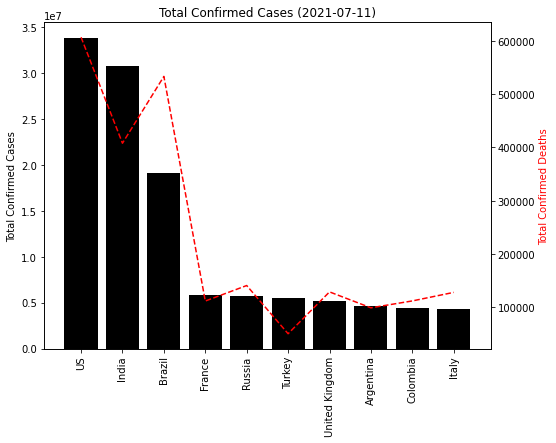

In [73]:
plt.figure(figsize=(8,6))

sns.barplot(temp['Country/Region'], temp['2021-07-11 00:00:00_x'], color = 'black')


plt.title('Total Confirmed Cases (2021-07-11)')
plt.xlabel('')

plt.ylabel('Total Confirmed Cases')
plt.xticks(rotation= 90)

ax = plt.gca()
ax2 = ax.twinx()

ax2.plot(temp['Country/Region'], temp['2021-07-11 00:00:00_y'], 'r--')
ax2.set_ylabel('Total Confirmed Deaths', color='red')

plt.show()

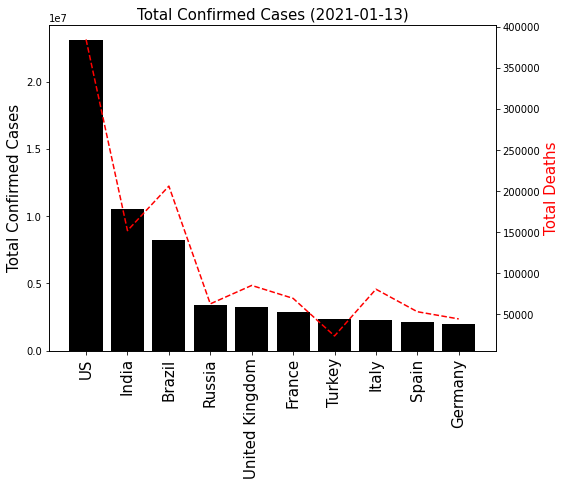

In [ ]:
# 이 셀의 결과가 지워지지 않도록 주의하세요.

### 문제 6. 특정 국가의 확진자 수 및 사망자 수 변화 시각화하기

In [102]:
# 나라별 시간에 따른 확진자 수 및 사망자 수 시각화하기
def plot_case_with_death(country):
  # TODO: 입력받은 국가의 누적 확진자/사망자 수 시각화
  plt.figure(figsize=(10,6))
  plt.plot(df_case.index, df_case[country], 'b-' )

  plt.xlim(right = df_case.index[-1])
  plt.ylim(0, df_case[country].max()*1.1)

  plt.title(f'{country} Cases & Deaths')
  plt.ylabel('Confirmed Cases', color = 'blue')
  plt.xlabel('Date')

  ax = plt.gca()
  ax2 = ax.twinx()

  ax2.plot(df_death.index, df_death[country], 'r--')
  ax2.set_ylabel('Death', color = 'red')
  ax2.set_ylim(0, df_death[country].max()*1.15)

In [103]:
df_case.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burma,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Comoros,Congo (Brazzaville),...,Seychelles,Sierra Leone,Singapore,Slovakia,Slovenia,Solomon Islands,Somalia,South Africa,South Sudan,Spain,Sri Lanka,Sudan,Summer Olympics 2020,Suriname,Sweden,Switzerland,Syria,Taiwan*,Tajikistan,Tanzania,Thailand,Timor-Leste,Togo,Trinidad and Tobago,Tunisia,Turkey,US,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,548,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,643,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,920,0,0,0,...,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,5,0,0,0,0,0,2,0,0,0,0,0,0,0,0,2,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1406,0,0,0,...,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,6,0,0,0,0,0,2,0,0,0,0,0,0,0,0,2,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2075,0,0,0,...,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,8,0,0,0,0,0,5,0,0,0,0,0,0,0,0,2,0,0,0,0


In [100]:
df_case['US'].cumsum()

Date
2020-01-22             1
2020-01-23             2
2020-01-24             4
2020-01-25             6
2020-01-26            11
                 ...    
2021-07-07    7355437546
2021-07-08    7389228051
2021-07-09    7423066797
2021-07-10    7456914581
2021-07-11    7490768529
Name: US, Length: 537, dtype: int64

In [77]:
df_case.index

DatetimeIndex(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
               '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
               '2020-01-30', '2020-01-31',
               ...
               '2021-07-02', '2021-07-03', '2021-07-04', '2021-07-05',
               '2021-07-06', '2021-07-07', '2021-07-08', '2021-07-09',
               '2021-07-10', '2021-07-11'],
              dtype='datetime64[ns]', name='Date', length=537, freq=None)

In [98]:
df_case.T[df_case.T.index.str.contains('Korea')]

Date,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,2020-02-01,2020-02-02,2020-02-03,2020-02-04,2020-02-05,2020-02-06,2020-02-07,2020-02-08,2020-02-09,2020-02-10,2020-02-11,2020-02-12,2020-02-13,2020-02-14,2020-02-15,2020-02-16,2020-02-17,2020-02-18,2020-02-19,2020-02-20,2020-02-21,2020-02-22,2020-02-23,2020-02-24,2020-02-25,2020-02-26,2020-02-27,2020-02-28,2020-02-29,2020-03-01,...,2021-06-02,2021-06-03,2021-06-04,2021-06-05,2021-06-06,2021-06-07,2021-06-08,2021-06-09,2021-06-10,2021-06-11,2021-06-12,2021-06-13,2021-06-14,2021-06-15,2021-06-16,2021-06-17,2021-06-18,2021-06-19,2021-06-20,2021-06-21,2021-06-22,2021-06-23,2021-06-24,2021-06-25,2021-06-26,2021-06-27,2021-06-28,2021-06-29,2021-06-30,2021-07-01,2021-07-02,2021-07-03,2021-07-04,2021-07-05,2021-07-06,2021-07-07,2021-07-08,2021-07-09,2021-07-10,2021-07-11
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"Korea, South",1,1,2,2,3,4,4,4,4,11,12,15,15,16,19,23,24,24,25,27,28,28,28,28,28,29,30,31,31,104,204,433,602,833,977,1261,1766,2337,3150,3736,...,142157,142852,143596,144152,144637,145091,145692,146303,146859,147422,147874,148273,148647,149191,149731,150238,150720,151149,151506,151901,152545,153155,153789,154457,155071,155572,156167,156961,157723,158549,159342,160084,160795,161541,162753,164028,165344,166722,168046,169146


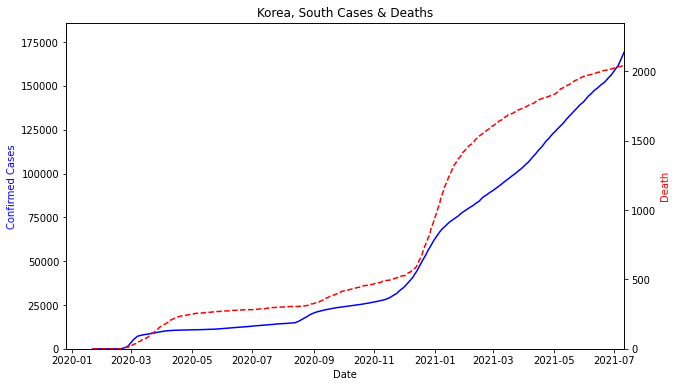

In [104]:
plot_case_with_death('Korea, South')

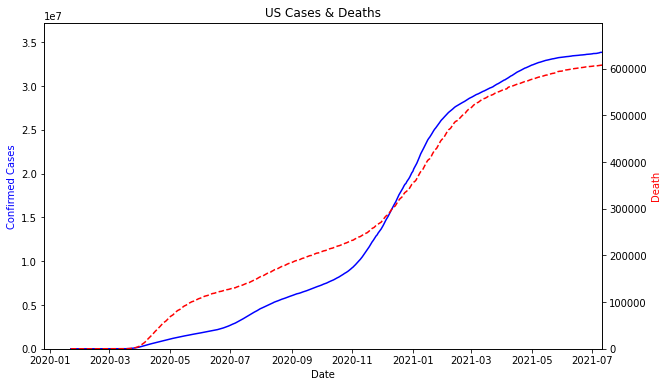

In [105]:
plot_case_with_death('US')

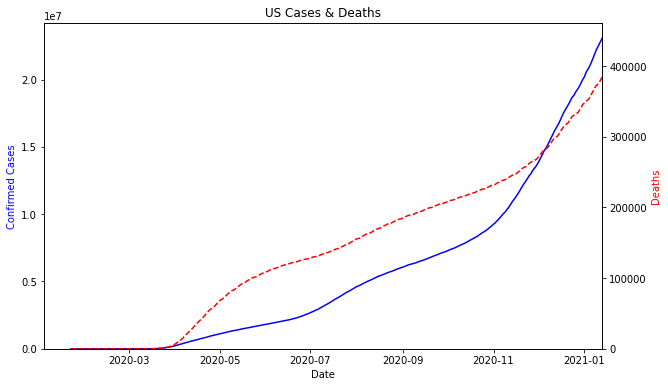

In [ ]:
# 아래와 같은 결과가 나오도록 하시오. 결과가 지워지지 않도록 주의하세요.
plot_case_with_death('US')

### 문제 7. 한국의 확진자 수 및 사망자 수 변화 시각화/분석하기

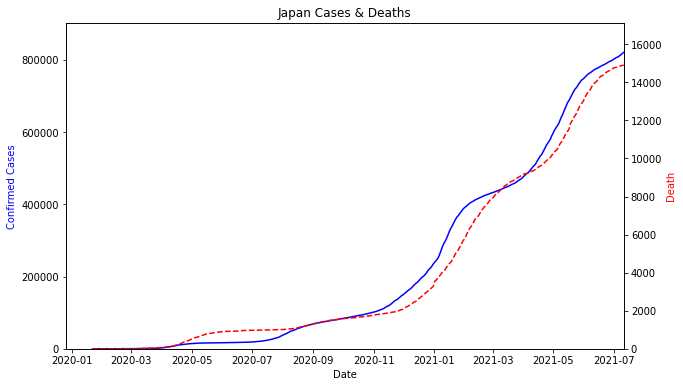

In [111]:
plot_case_with_death('Japan')

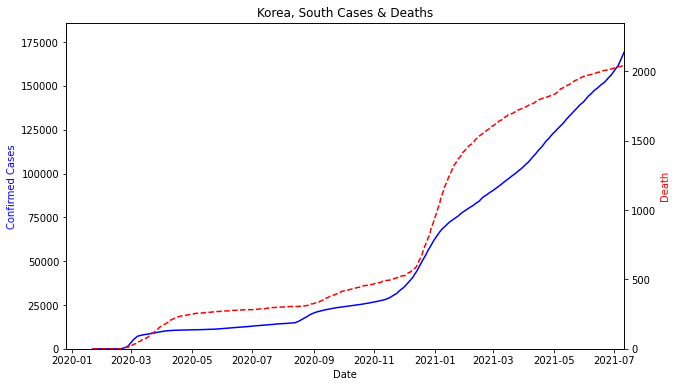

In [108]:
# 한국의 누적 확진자 수/사망자 수를 시각화하고 분석하시오.

plot_case_with_death('Korea, South')

(0.0, 42.0)

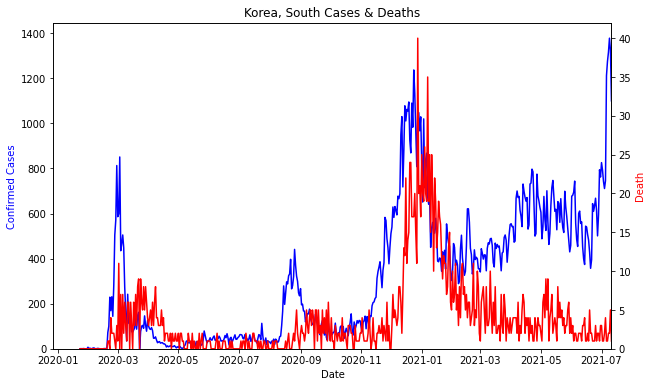

In [114]:
# 한국의 일일 확진자 수/사망자 수를 시각화하고 분석하시오.

country = 'Korea, South'
plt.figure(figsize=(10,6))
plt.plot(df_case.index, df_case[country].diff(), 'b-' )

plt.xlim(right = df_case.index[-1])
plt.ylim(bottom = 0)

plt.title(f'{country} Cases & Deaths')
plt.ylabel('Confirmed Cases', color = 'blue')
plt.xlabel('Date')

ax = plt.gca()
ax2 = ax.twinx()

ax2.plot(df_death.index, df_death[country].diff(), 'r-')
ax2.set_ylabel('Death', color = 'red')
ax2.set_ylim(bottom = 0)


## Step 3. Plotly를 이용하여 데이터 시각화하기

### 문제 8. Plotly의 Choropleth 데이터 포맷으로 맞추기

In [115]:
import plotly.graph_objects as go

In [116]:
# 아래 데이터프레임를 이용하여 국가명을 국가코드로 변경
df_code = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2014_world_gdp_with_codes.csv')

# Hint) 이름이 다르게 쓰인 국가의 이름을 먼저 변경한 후에 코드로 변경
country_renamer = {
    'Bahamas':'Bahamas, The',
    'Congo (Brazzaville)':'Congo, Republic of the',
    'Congo (Kinshasa)':'Congo, Democratic Republic of the',
    'Czechia':'Czech Republic',
    'Eswatini':'Swaziland',
    'Gambia':'Gambia, The',
    'North Macedonia':'Macedonia',
    'Taiwan*':'Taiwan',
    'US':'United States',
    'West Bank and Gaza':'West Bank'
}

In [140]:
df_code

,COUNTRY,GDP (BILLIONS),CODE
0,Afghanistan,21.71,AFG
1,Albania,13.40,ALB
2,Algeria,227.80,DZA
3,American Samoa,0.75,ASM
4,Andorra,4.80,AND
...,...,...,...
217,Virgin Islands,5.08,VGB
218,West Bank,6.64,WBG
219,Yemen,45.45,YEM
220,Zambia,25.61,ZMB


In [122]:
df_case = df_case.rename(columns  = country_renamer)

In [152]:
date = '2021-07-11'
# date = pd.to_datetime(date)
df_case.T[date]

Country/Region
Afghanistan    131586
Albania        132592
Algeria        146064
Andorra         14075
Angola          39958
                ...  
Vietnam         30478
West Bank      315160
Yemen            6948
Zambia         175729
Zimbabwe        67765
Name: 2021-07-11 00:00:00, Length: 195, dtype: int64

In [161]:
date = '2021-07-11'
temp = df_case.T[date].reset_index()
col = temp.columns[-1]

temp = temp.rename(columns = { col : 'cases'})
temp = temp.merge(df_code, how = 'left', left_on='Country/Region', right_on='COUNTRY' )
temp

,Country/Region,cases,COUNTRY,GDP (BILLIONS),CODE
0,Afghanistan,131586,Afghanistan,21.71,AFG
1,Albania,132592,Albania,13.40,ALB
2,Algeria,146064,Algeria,227.80,DZA
3,Andorra,14075,Andorra,4.80,AND
4,Angola,39958,Angola,131.40,AGO
...,...,...,...,...,...
190,Vietnam,30478,Vietnam,187.80,VNM
191,West Bank,315160,West Bank,6.64,WBG
192,Yemen,6948,Yemen,45.45,YEM
193,Zambia,175729,Zambia,25.61,ZMB


In [165]:
# 공식 레퍼런스 참조: https://plotly.com/python/choropleth-maps/#world-choropleth-map
def get_choropleth_data(date):
  # TODO: date에 해당하는 날짜로 데이터 생성

  df = df_case.T[date].reset_index()
  col = df.columns[-1]

  df = df.rename(columns = { col : 'cases'})
  df = df.merge(df_code, how = 'left', left_on='Country/Region', right_on='COUNTRY' )

  data=go.Choropleth(
    locations = df['CODE'],
    z = df['cases'],
    text = df['COUNTRY'],
    colorscale = 'Blues',
    autocolorscale=False,
    reversescale=True,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_title = 'Cases<br> 명',
    )
  
  return data

### 문제 9. Choropleth map 시각화하기

In [ ]:
# 공식 레퍼런스 참조: https://plotly.com/python/choropleth-maps/#world-choropleth-map


In [171]:
date = '2021-07-11'
fig = go.Figure(data=get_choropleth_data(date))

fig.update_layout(
    title_text='Covid19 Confirmed Cases / ' + date,
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    )
)

fig.show()

## Step 4. 모델 학습을 위한 데이터 전처리 

### 문제 10. FBProphet 학습을 위한 데이터프레임 생성

In [173]:
# 공식 레퍼런스 참조: https://facebook.github.io/prophet/docs/quick_start.html#python-api
# 한국의 확진자 수 데이터를 FBProphet에 학습하기 위한 데이터프레임으로 재구성하시오.
df = pd.DataFrame(df_case.reset_index()[['Date', 'Korea, South']].to_numpy(), columns=['ds','y'])
df


,ds,y
0,2020-01-22,1
1,2020-01-23,1
2,2020-01-24,2
3,2020-01-25,2
4,2020-01-26,3
...,...,...
532,2021-07-07,164028
533,2021-07-08,165344
534,2021-07-09,166722
535,2021-07-10,168046


### 문제 11. 학습데이터와 테스트데이터 분리하기


In [174]:
from math import floor

In [181]:
def train_test_split_df(df, test_size):
  # TODO: test_size(0 < test_size < 1) 비율에 따라 테스트/학습 데이터프레임으로 나누어 반환
  div = floor(df.shape[0] * ( 1- test_size))

  return df.loc[:div], df.loc[div+1:]

In [182]:
train_df, test_df = train_test_split_df(df, 0.1)

## Step 5. Prophet 모델 학습하기

### 문제 12. Prophet 모델 생성 및 학습 데이터 학습하기

In [178]:
from fbprophet import Prophet

In [183]:
train_df

,ds,y
0,2020-01-22,1
1,2020-01-23,1
2,2020-01-24,2
3,2020-01-25,2
4,2020-01-26,3
...,...,...
479,2021-05-15,131671
480,2021-05-16,132290
481,2021-05-17,132818
482,2021-05-18,133471


In [184]:
test_df

,ds,y
484,2021-05-20,134678
485,2021-05-21,135344
486,2021-05-22,135929
487,2021-05-23,136467
488,2021-05-24,136983
489,2021-05-25,137682
490,2021-05-26,138311
491,2021-05-27,138898
492,2021-05-28,139431
493,2021-05-29,139910


In [191]:
model = Prophet(changepoint_range=1.0)
model.fit(train_df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


### 문제 13. Prophet 모델 학습 결과 시각화하기

In [185]:
from fbprophet.plot import add_changepoints_to_plot

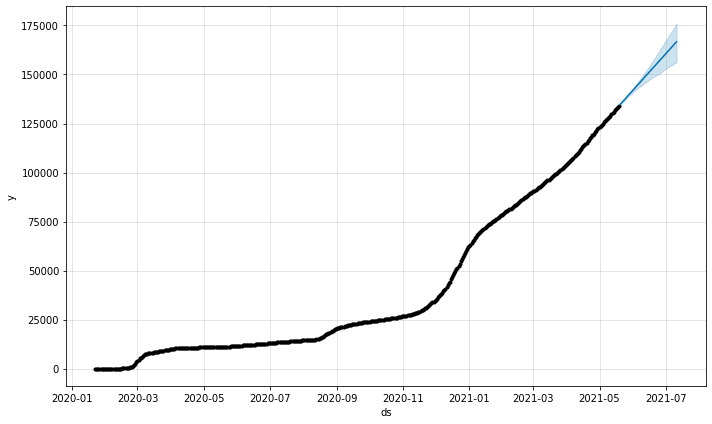

In [192]:
# model.plot() 메소드, model.plot_components() 메소드, add_changepoints_to_plot() 메소드 활용

pred = model.predict(test_df)
model.plot(pred);

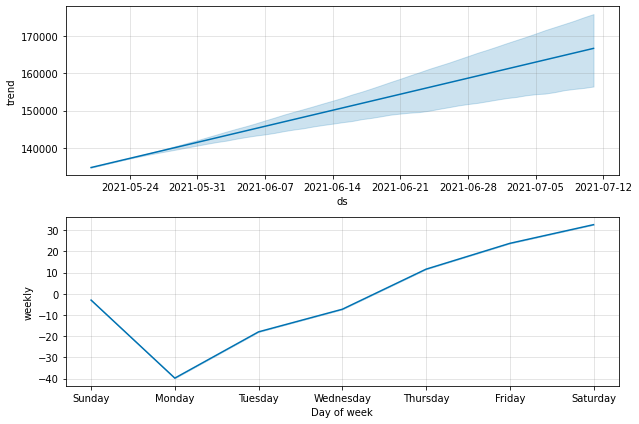

In [194]:
model.plot_components(pred);

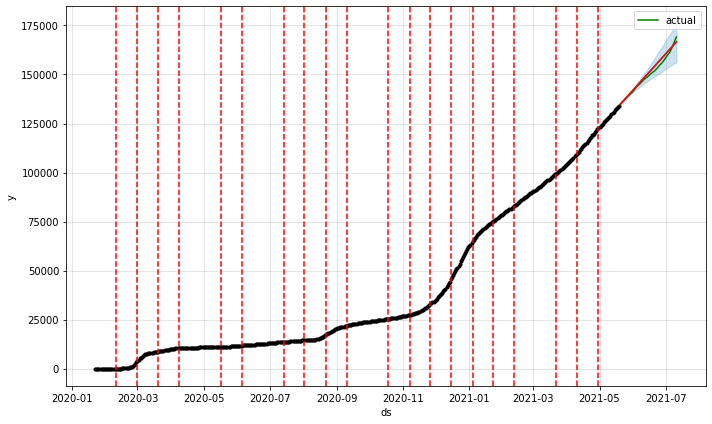

In [197]:
fig = model.plot(pred)

plt.plot(test_df['ds'], test_df['y'], 'g-', label='actual')
add_changepoints_to_plot(fig.gca(), model, pred)
plt.legend()

### 문제 14. 모델 학습 결과 평가하기

In [198]:
from sklearn.metrics import r2_score

In [199]:
# test_df와 pred를 비교하여 r2_score 평가
print('R2 Score : ', r2_score(test_df['y'], pred['yhat'] ) )

R2 Score :  0.9743572050504921


### 문제 15. Prophet 모델로 미래 30일 데이터 예측하기

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


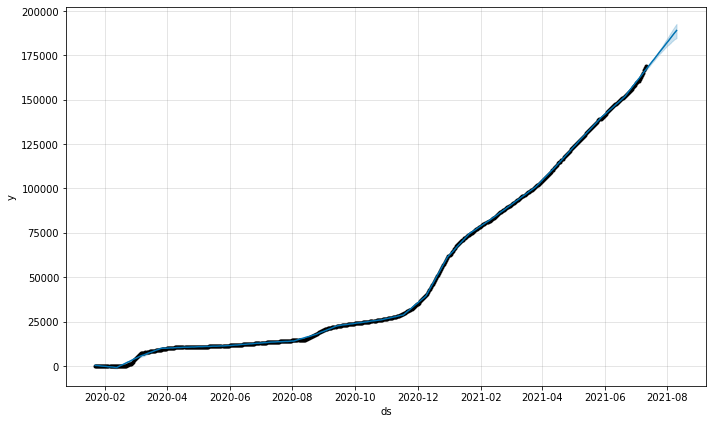

In [201]:
# 전체 df를 학습한 후, 향후 30일에 대한 데이터 예측하기
# Hint) make_future_dataframe() 메소드 활용

model = Prophet(changepoint_range = 1.0)
model.fit(df)
future = model.make_future_dataframe(30)
pred = model.predict(future)
model.plot(pred);

## Step 6. IF-CASE 예측해보기


### 문제 16. 한국 확진자 수 변화의 특별한 이벤트 확인하기


In [202]:
# 코로나 확산 초기, 한국의 확진자 수가 급증한 시점 찾기
df['ds'][0]

Timestamp('2020-01-22 00:00:00')

In [205]:
df.loc[25:50]

,ds,y
25,2020-02-16,29
26,2020-02-17,30
27,2020-02-18,31
28,2020-02-19,31
29,2020-02-20,104
30,2020-02-21,204
31,2020-02-22,433
32,2020-02-23,602
33,2020-02-24,833
34,2020-02-25,977


### 문제 17. 이벤트가 없었을 경우 한국의 확진자 수 변화 예측하기


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


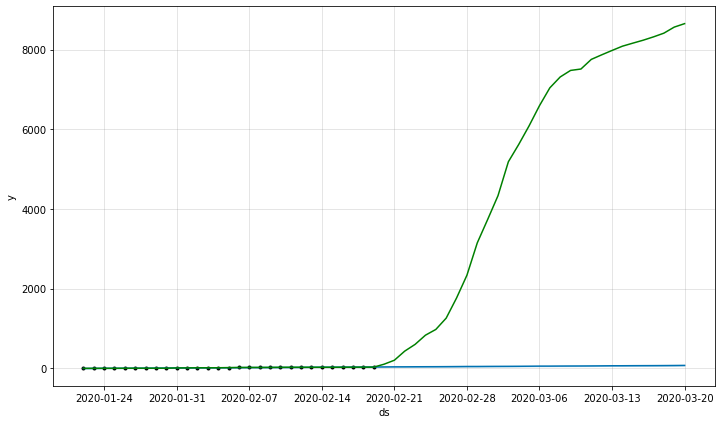

In [213]:
# 확진자 수가 급증하기 전 데이터를 학습 후, 해당 시점으로부터 30일 간의 데이터 예측하여 실제 값과 비교하기

model = Prophet(changepoint_range=1.0)
model.fit(df.loc[:28])

future = model.make_future_dataframe(30)
pred = model.predict(future)

model.plot(pred)
plt.plot(df.loc[:58]['ds'], df.loc[:58]['y'], 'g-')
plt.show()